<a href="https://colab.research.google.com/github/Pranjal3230/Kaggle-NLP-Disaster-Real-or-Not-with-Tensorflow2.x/blob/master/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow==2.1.0


     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 3.9MB 44.6MB/s 
     |████████████████████████████████| 450kB 43.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=384215076ec3ebebced63ded0d41ab087cc240ec019c6600f1b62bedff6f4cb9
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc

In [0]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow import keras
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from __future__ import absolute_import, division, print_function, unicode_literals
from keras.callbacks import TensorBoard
# Load the TensorBoard notebook extension
import datetime
import time

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
%load_ext tensorboard

In [0]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [0]:

df=pd.read_csv("train.csv")
df1=pd.read_csv("test.csv")

In [0]:
df3=pd.read_csv("sample_submission.csv")

In [0]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [0]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [0]:
df1.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [0]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


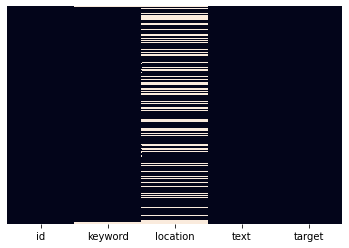

In [0]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

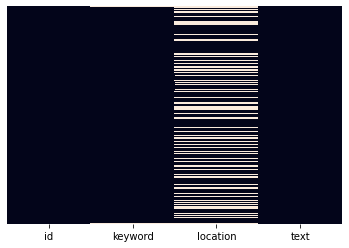

In [0]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False)

In [0]:
df['keyword'].fillna(df['keyword'].mode()[0], inplace=True)
df1['keyword'].fillna(df1['keyword'].mode()[0], inplace=True)

In [0]:
print(df['location'].mode()[0])

USA


In [0]:
df['location'].fillna(df['location'].mode()[0], inplace=True)
df1['location'].fillna(df1['location'].mode()[0], inplace=True)


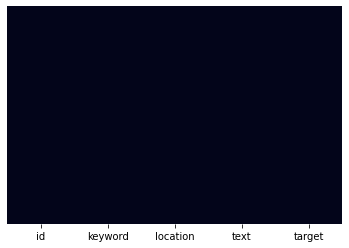

In [0]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [0]:
df1.isnull().sum()

id          0
keyword     0
location    0
text        0
dtype: int64

In [0]:
df.pop('id')
df1.pop('id')

0           0
1           2
2           3
3           9
4          11
        ...  
3258    10861
3259    10865
3260    10868
3261    10874
3262    10875
Name: id, Length: 3263, dtype: int64

In [0]:
df1.isnull().sum()

keyword     0
location    0
text        0
dtype: int64

In [0]:
tr=df['text']
tr1=df1['text']

In [0]:
tar=df['target']

In [0]:
sent=[]
for sentence in tr:
  sent.append(sentence)
print(sent[0])

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all


In [0]:
sent1=[]
for sentence in tr1:
  sent1.append(sentence)
print(sent1[0])

Just happened a terrible car crash


In [0]:
label=[]
for sentence in tar:
  label.append(sentence)
print(label[0])

1


In [0]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sent)
vocab_size = len(tokenizer.word_counts)
print("vocabulary size: {:d}".format(vocab_size))
word2idx = tokenizer.word_index
idx2word = {v:k for (k, v) in word2idx.items()}

vocabulary size: 22700


In [0]:
seq_lengths = np.array([len(s.split()) for s in sent])
print([(p, np.percentile(seq_lengths, p)) for p
 in [75, 80, 90, 95, 99, 100]])

[(75, 19.0), (80, 20.0), (90, 22.0), (95, 24.0), (99, 27.0), (100, 31.0)]


In [0]:
max_seqlen = 31
# create dataset
sentences_as_ints = tokenizer.texts_to_sequences(sent)
sentences_as_ints = tf.keras.preprocessing.sequence.pad_sequences(
 sentences_as_ints, maxlen=max_seqlen)
labels_as_ints = np.array(label)

dataset = tf.data.Dataset.from_tensor_slices(
 (sentences_as_ints, labels_as_ints))


In [0]:
label1=[]
for i in range(len(sent1)):
  label1.append(0)

In [0]:

sentences_as_ints = tokenizer.texts_to_sequences(sent1)
sentences_as_ints = tf.keras.preprocessing.sequence.pad_sequences(
 sentences_as_ints, maxlen=max_seqlen)
labels_as_ints = np.array(label1)
dataset1 = tf.data.Dataset.from_tensor_slices(
 (sentences_as_ints, labels_as_ints))

In [0]:


dataset = dataset.shuffle(300)





test_size = len(sent) // 5
val_size = (len(sent)) // 7
test_dataset = dataset.take(test_size)
val_dataset = dataset.skip(test_size).take(val_size)
train_dataset = dataset.skip( test_size + val_size)
batch_size = 32
train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)
print(val_size)
print(len(sent))
print(test_size)

1087
7613
1522


In [0]:
pred_dataset = dataset1.batch(batch_size)

In [0]:
class SentimentAnalysisModel(tf.keras.Model):
  def __init__(self, vocab_size, max_seqlen, **kwargs):
    super(SentimentAnalysisModel, self).__init__(**kwargs)
    self.embedding = tf.keras.layers.Embedding(
    vocab_size, max_seqlen)
    self.bilstm = tf.keras.layers.Bidirectional(
    tf.keras.layers.LSTM(max_seqlen)
    )
    
    self.dense = tf.keras.layers.Dense(64, activation="relu")
    
    self.out = tf.keras.layers.Dense(1, activation="sigmoid")
  def call(self, x):
    x = self.embedding(x)
    x = self.bilstm(x)
    x = self.dense(x)
    x = self.out(x)
    return x
model = SentimentAnalysisModel(vocab_size+1, max_seqlen)
model.build(input_shape=(batch_size, max_seqlen))
model.summary()
# compile
model.compile(
 loss="binary_crossentropy",
 optimizer="adam",
 metrics=["accuracy"]
)
data_dir = "./"
logs_dir = os.path.join("./logs")

best_model_file = os.path.join(data_dir, "best_model.h5")
checkpoint = tf.keras.callbacks.ModelCheckpoint(best_model_file,
 save_weights_only=True,
 save_best_only=True)
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=logs_dir)
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs,
 validation_data=val_dataset,
 callbacks=[checkpoint, tensorboard])
model = SentimentAnalysisModel(vocab_size+1, max_seqlen)
model.build(input_shape=(batch_size, max_seqlen))
model.summary()
# compile


Model: "sentiment_analysis_model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     multiple                  703731    
_________________________________________________________________
bidirectional_15 (Bidirectio multiple                  15624     
_________________________________________________________________
dense_30 (Dense)             multiple                  4032      
_________________________________________________________________
dense_31 (Dense)             multiple                  65        
Total params: 723,452
Trainable params: 723,452
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
501/501 [==============================] - 14s 29ms/step - loss: 0.5243 - accuracy: 0.7366 - val_loss: 0.4333 - val_accuracy: 0.8123
Epoch 2/10
501/501 [==============================] - 13s 27ms/step - loss: 0.2877 - ac

In [0]:
print(logs_dir)

./logs


In [0]:
best_model = SentimentAnalysisModel(vocab_size+1, max_seqlen)
best_model.build(input_shape=(batch_size, max_seqlen))
best_model.load_weights(best_model_file)
best_model.compile(
 loss="binary_crossentropy",
 optimizer="adam",
 metrics=["accuracy"]
)

In [0]:
test_loss, test_acc = best_model.evaluate(test_dataset)
print("test loss: {:.3f}, test accuracy: {:.3f}".format(
 test_loss, test_acc))

153/153 [==============================] - 1s 4ms/step - loss: 0.7385 - accuracy: 0.8127
test loss: 0.739, test accuracy: 0.813


In [0]:


num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs,
 validation_data=val_dataset,
 )

Epoch 1/10
143/143 [==============================] - 5s 34ms/step - loss: 0.6009 - accuracy: 0.6662 - val_loss: 0.5033 - val_accuracy: 0.7574
Epoch 2/10
143/143 [==============================] - 4s 28ms/step - loss: 0.3145 - accuracy: 0.8654 - val_loss: 0.4045 - val_accuracy: 0.8225
Epoch 3/10
143/143 [==============================] - 4s 29ms/step - loss: 0.1542 - accuracy: 0.9392 - val_loss: 0.4874 - val_accuracy: 0.8146
Epoch 4/10
143/143 [==============================] - 4s 28ms/step - loss: 0.0876 - accuracy: 0.9702 - val_loss: 0.4377 - val_accuracy: 0.8698
Epoch 5/10
143/143 [==============================] - 4s 29ms/step - loss: 0.0657 - accuracy: 0.9812 - val_loss: 0.4802 - val_accuracy: 0.8718
Epoch 6/10
143/143 [==============================] - 4s 28ms/step - loss: 0.0551 - accuracy: 0.9823 - val_loss: 0.3094 - val_accuracy: 0.9053
Epoch 7/10
143/143 [==============================] - 4s 28ms/step - loss: 0.0406 - accuracy: 0.9895 - val_loss: 0.3874 - val_accuracy: 0.9014

In [0]:
tensorboard --logdir /logs

NameError: ignored

In [0]:
labels, predictions = [], []
idx2word[0] = "PAD"
is_first_batch = True
for test_batch in test_dataset:
    inputs_b, labels_b = test_batch
    pred_batch = model.predict(inputs_b)
    predictions.extend([(1 if p > 0.5 else 0) for p in pred_batch])
    labels.extend([l for l in labels_b])
    if is_first_batch:
  # print first batch of label, prediction, and sentence
      for rid in range(inputs_b.shape[0]):
        words = [idx2word[idx] for idx in inputs_b[rid].numpy()]
        words = [w for w in words if w != "PAD"]
        sentence = " ".join(words)
        print("{:d}\t{:d}\t{:s}".format(
          labels[rid], predictions[rid], sentence))
      is_first_batch = False
print("accuracy score: {:.3f}".format(accuracy_score(labels,
predictions)))
print("confusion matrix")
print(confusion_matrix(labels, predictions)

SyntaxError: ignored

In [0]:
pred=best_model.predict(pred_dataset)

In [0]:
g=[]
for n in pred:
  if n>0.5:
     g.append([1])

  else:
    g.append([0])
 
 

print("p", g)


prediction=pd.DataFrame(g)

p [[1], [1], [1], [1], [1], [1], [0], [0], [0], [0], [0], [0], [1], [0], [0], [1], [0], [1], [0], [0], [0], [0], [0], [1], [0], [1], [0], [0], [0], [1], [0], [1], [1], [0], [1], [0], [0], [1], [0], [1], [0], [0], [0], [1], [0], [0], [0], [0], [1], [0], [0], [0], [1], [0], [0], [1], [0], [0], [0], [0], [1], [0], [0], [1], [0], [1], [1], [1], [1], [1], [0], [1], [1], [1], [1], [1], [0], [0], [0], [1], [0], [1], [1], [1], [1], [1], [0], [0], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [0], [1], [1], [1], [0], [0], [0], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [0], [1], [0], [1], [1], [1], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [1], [0], [0], [0], [0], [0], [0], [0], [0], [1], [1], [1], [1], [0], [1], [1], [1], [1], [1], [1], [1], [1], [0], [1], [0], [1], [1], [1], [0], [0], [1], [1], [1], [1], [0], [1], [1], [0], [0], [1], [1], [0], [1

In [0]:
df3.pop('target')

0       0
1       0
2       0
3       0
4       0
       ..
3258    0
3259    0
3260    0
3261    0
3262    0
Name: target, Length: 3263, dtype: int64

In [0]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      3263 non-null   int64
dtypes: int64(1)
memory usage: 25.6 KB


In [0]:
df3=pd.concat([df3['id'],prediction],axis=1)

In [0]:
df3.columns=['id','target']

In [0]:
df3.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [0]:
df3.to_csv('f4text_classification_submission.csv',index=False)